In [3]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st 
import hvplot.pandas

# Import API Key


# Read Crimes CSV File
crime_data_all_df = pd.read_csv("crimes.csv")


#Show dataframe

crime_data_all_df



,year,state_abbr,state_name,population,violent_crime,homicide,rape_legacy,rape_revised,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft,caveats
0,1979,NaN,NaN,220099000,1208030,21460,76390.0,NaN,480700,629480,11041500,3327700,6601000,1112800,NaN
1,1979,AK,Alaska,406000,1994,54,292.0,NaN,445,1203,23193,5616,15076,2501,NaN
2,1979,AL,Alabama,3769000,15578,496,1037.0,NaN,4127,9918,144372,48517,83791,12064,NaN
3,1979,AR,Arkansas,2180000,7984,198,595.0,NaN,1626,5565,70949,21457,45267,4225,NaN
4,1979,AZ,Arizona,2450000,14528,219,1120.0,NaN,4305,8884,177977,48916,116976,12085,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2279,2022,VT,Vermont,647064,1436,22,NaN,238.0,86,1090,10813,984,9224,605,NaN
2280,2022,WA,Washington,7785786,29247,387,NaN,3055.0,6756,19049,261323,43837,167709,49777,NaN
2281,2022,WI,Wisconsin,5892539,17502,314,NaN,2273.0,2323,12592,81611,9059,57805,14747,NaN
2282,2022,WV,West Virginia,1775156,4934,81,NaN,789.0,178,3886,21836,3377,16885,1574,NaN


In [4]:
# Clean data remove caveats incomplete information
clean_data = crime_data_all_df.drop(columns=["caveats"])

# Add two columns together legacy_ and revised_
  
    # First fill NaN row with a 0 value because you can not add NaN values together.
clean_data["rape_legacy"].fillna(0,inplace=True)
clean_data["rape_revised"].fillna(0,inplace=True)
  
    # Use the revised column. If 0 value in revised then use legacy number
clean_data["rape_revised"].fillna(clean_data["rape_legacy"], inplace=True)
clean_data.loc[(clean_data["rape_revised"] == 0) & (clean_data["rape_legacy"].notnull()), "rape_revised"] = clean_data["rape_legacy"]



    # Drop additional column since all values are in the legacy column
clean_data.drop(columns=["rape_legacy"], inplace=True)

  

    # Index 1st column as Year
clean_data = clean_data.set_index("year")
    
    # Drop column State_name since we have a State abbreviated column
clean_data.drop(columns=["state_name"],inplace=True)

    # Drop rows in State_abbr  with NaN value these were totals  
clean_data = clean_data.dropna(subset="state_abbr")


clean_data







,state_abbr,population,violent_crime,homicide,rape_revised,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft
year,,,,,,,,,,,
1979,AK,406000,1994,54,292.0,445,1203,23193,5616,15076,2501
1979,AL,3769000,15578,496,1037.0,4127,9918,144372,48517,83791,12064
1979,AR,2180000,7984,198,595.0,1626,5565,70949,21457,45267,4225
1979,AZ,2450000,14528,219,1120.0,4305,8884,177977,48916,116976,12085
1979,CA,22696000,184087,2952,12239.0,75767,93129,1511021,496310,847148,167563
...,...,...,...,...,...,...,...,...,...,...,...
2022,VT,647064,1436,22,238.0,86,1090,10813,984,9224,605
2022,WA,7785786,29247,387,3055.0,6756,19049,261323,43837,167709,49777
2022,WI,5892539,17502,314,2273.0,2323,12592,81611,9059,57805,14747


In [5]:
# Specify the columns for crime calculation
crime_columns = ["violent_crime", "homicide", "rape_revised", "robbery", "aggravated_assault", "property_crime", "burglary", "larceny", "motor_vehicle_theft"]

# Calculate the total crime
clean_data["Total_Crime"] = clean_data[crime_columns].sum(axis=1)

# Calculate the total crime per 100,000 people to get avg crime rate
clean_data["Total Crime per 100,000"] = round((clean_data["Total_Crime"] / clean_data["population"]) * 100000, 1)

# Calculate the total crime per capita
clean_data["Crime per Capita"] =round(clean_data["Total_Crime"] / clean_data["population"] * 100,1 )


clean_data




,state_abbr,population,violent_crime,homicide,rape_revised,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft,Total_Crime,"Total Crime per 100,000",Crime per Capita
year,,,,,,,,,,,,,,
1979,AK,406000,1994,54,292.0,445,1203,23193,5616,15076,2501,50374.0,12407.4,12.4
1979,AL,3769000,15578,496,1037.0,4127,9918,144372,48517,83791,12064,319900.0,8487.7,8.5
1979,AR,2180000,7984,198,595.0,1626,5565,70949,21457,45267,4225,157866.0,7241.6,7.2
1979,AZ,2450000,14528,219,1120.0,4305,8884,177977,48916,116976,12085,385010.0,15714.7,15.7
1979,CA,22696000,184087,2952,12239.0,75767,93129,1511021,496310,847148,167563,3390216.0,14937.5,14.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022,VT,647064,1436,22,238.0,86,1090,10813,984,9224,605,24498.0,3786.0,3.8
2022,WA,7785786,29247,387,3055.0,6756,19049,261323,43837,167709,49777,581140.0,7464.1,7.5
2022,WI,5892539,17502,314,2273.0,2323,12592,81611,9059,57805,14747,198226.0,3364.0,3.4


In [6]:
#Calculate average Total Crime Rate
state_crime_per_capita = clean_data.groupby("state_abbr")["Crime per Capita"].mean()

# Find two states with the highest/lowest overall crime
highest_crime_capita = state_crime_per_capita.nlargest(2)
lowest_crime_capita = state_crime_per_capita.nsmallest(2)

print("States with the highest Crime per Capita")
print(highest_crime_capita)
print("\nStates with the lowest Crime per Capita")
print(lowest_crime_capita)



States with the highest Crime per Capita
state_abbr
DC    15.888636
FL    11.572727
Name: Crime per Capita, dtype: float64

States with the lowest Crime per Capita
state_abbr
WV    4.865909
SD    5.011364
Name: Crime per Capita, dtype: float64


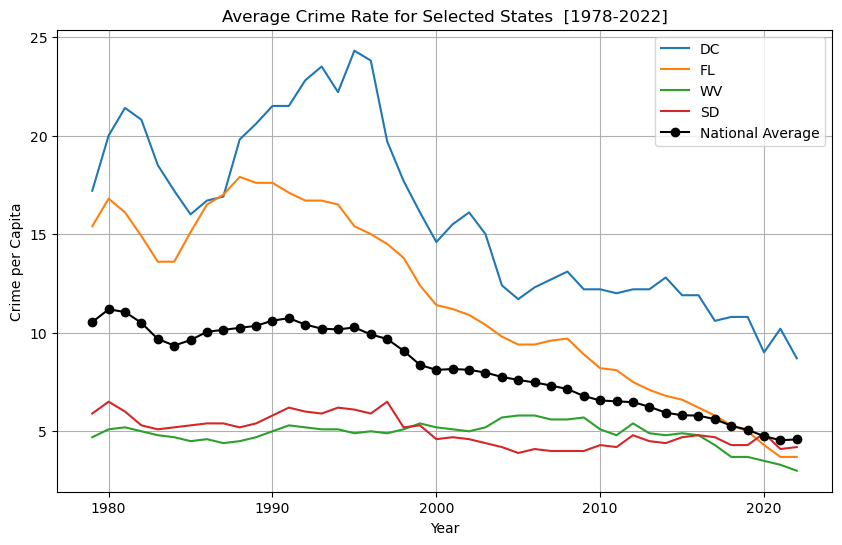

In [8]:
# Plot States PER CAPITA
# Define states create dictionary
states_to_plot = ["DC", "FL", "WV", "SD"]
# Get data from states
data_from_states = clean_data[clean_data["state_abbr"].isin(states_to_plot)]

plt.figure(figsize=(10, 6))
for state in states_to_plot:
    state_data = data_from_states[data_from_states["state_abbr"] == state]
    plt.plot(state_data.index, state_data["Crime per Capita"], label=state)

plt.title("Average Crime Rate for Selected States  [1978-2022]")
plt.xlabel("Year")
plt.ylabel("Crime per Capita")
plt.grid(True)
plt.legend(title="State")
# plot more tick marks on x and y axis
# plot national avg
national_avg = clean_data.groupby("year")["Crime per Capita"].mean()
plt.plot(national_avg.index, national_avg.values, marker="o", color="black",label = "National Average")
plt.legend()
# plt.savefig("output_data/fig1.png")

            
plt.show()


In [ ]:
data_from_states

,state_abbr,population,violent_crime,homicide,rape_revised,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft,Total_Crime,"Total Crime per 100,000",Crime per Capita
year,,,,,,,,,,,,,,
1979,DC,656000,10553,180,489.0,6920,2964,45877,13452,28819,3606,112860.0,17204.3,17.2
1979,FL,8860000,73881,1084,4576.0,22097,46124,607281,190884,378099,38298,1362324.0,15376.1,15.4
1979,SD,689000,1096,14,113.0,140,829,19297,4316,13782,1199,40786.0,5919.6,5.9
1979,WV,1878000,3156,128,291.0,825,1912,40513,11959,24755,3799,87338.0,4650.6,4.7
1980,DC,635233,12772,200,439.0,8897,3236,50896,16260,31068,3568,127336.0,20045.6,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021,WV,1785526,5205,108,945.0,210,3942,24225,3839,18408,1978,58860.0,3296.5,3.3
2022,DC,671803,5457,197,279.0,2402,2579,23926,1352,18696,3878,58766.0,8747.5,8.7
2022,FL,22244823,57587,1113,6714.0,7477,42283,348403,38594,279116,30693,811980.0,3650.2,3.7


In [ ]:
# CSV File to use with unemployment df
data_from_states.to_csv("crime_states", index=True)

In [ ]:
# All states crime per Capita to compare


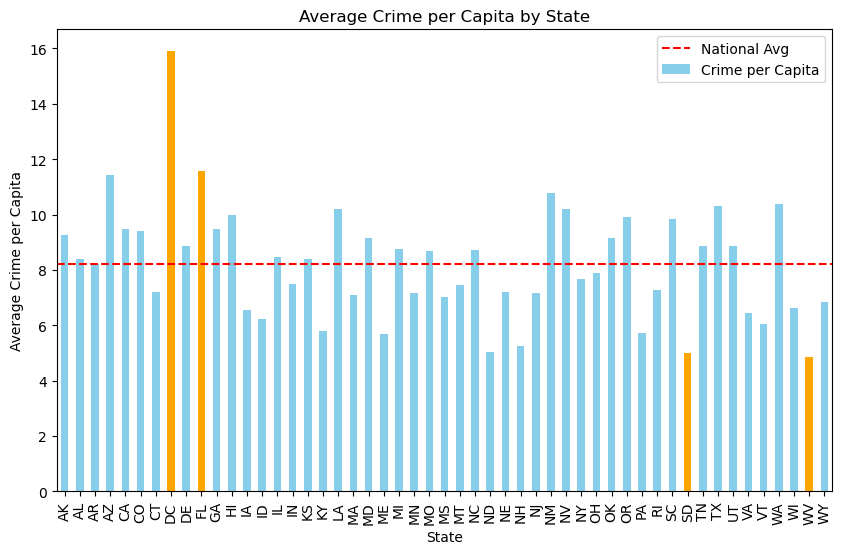

In [9]:
custom_colors = ['orange' if state in ['SD', 'FL', 'DC', 'WV'] else 'skyblue' for state in state_crime_per_capita.index]
plt.figure(figsize=(10, 6))
state_crime_per_capita.plot(kind='bar', color=custom_colors)


# Plotting national average line
national_avg_value = national_avg.mean()
plt.axhline(y=national_avg_value, color='red', linestyle='--', label='National Avg')

# Adding labels and title
plt.xlabel('State')
plt.ylabel('Average Crime per Capita')
plt.title('Average Crime per Capita by State')

# Show legend
plt.legend()
# plt.savefig("output_data/fig3.png")
plt.show()
